In [12]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

In [13]:
R1 = 1e3
R2 = 10e3
C1 = 3.3e-6
C2 = 3.3e-6

In [14]:
w0 = np.sqrt(1/(C1*C2*R1*R2))
xi = (1/(2*w0))*((1/(R1*C1))+(1/(R2*C2)))
xi

num = w0**2
den = [1,2*xi*w0, w0**2]
w0

95.82659576267817

In [15]:
H = ct.tf(num,den)

H

TransferFunction(array([9182.73645546]), array([1.00000000e+00, 3.33333333e+02, 9.18273646e+03]))

{'RiseTime': 0.07368272297580945,
 'SettlingTime': 0.13354993539365465,
 'SettlingMin': 0.9033612219341107,
 'SettlingMax': 1.0,
 'Overshoot': 0,
 'Undershoot': 0,
 'Peak': 0.9988888888888895,
 'PeakTime': 0.2279559242064105,
 'SteadyStateValue': 1.0}

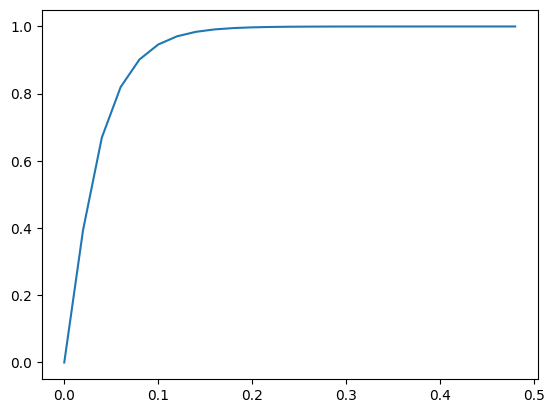

In [16]:
t = np.arange(0,0.5,0.02)
y = ct.step_response(H,T=t)[1]

plt.plot(t,y)
ct.step_info(H)

In [17]:
ct.poles(H)

array([-303.03030303+0.j,  -30.3030303 +0.j])

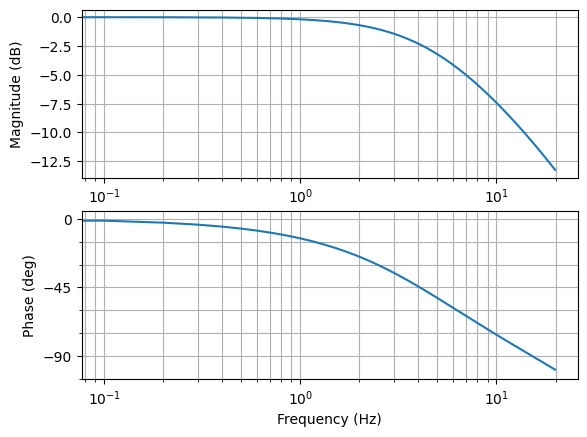

In [18]:
w = 2*np.pi*np.arange(0,20,0.1)
ct.bode_plot(H, omega = w, dB = True, Hz = True, plot = True);
# plt.figure()
# plt.semilogx(w, magnitude)
# plt.grid()
# plt.xlabel('Frequência (Hz)')
# plt.ylabel('Magnitude (dB)')
# plt.title('Diagrama de Bode - Magnitude')
# # plt.xpick([1,10,10.15,10.5,10,6])
# plt.show()

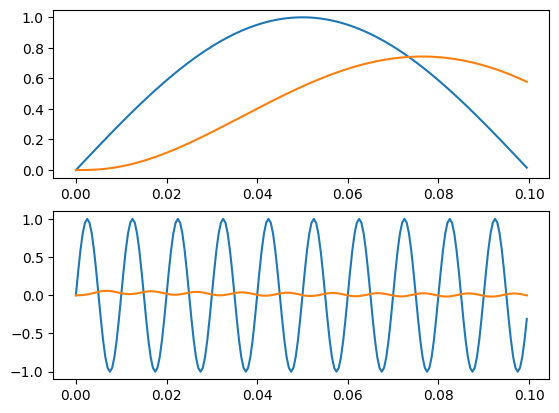

In [19]:
Ts = 500e-6
f1 = 5
f2 = 100

t = np.arange(0,0.1,Ts)
u1 = 1*np.sin(2*np.pi*f1*t)
u2 = 1*np.sin(2*np.pi*f2*t)


y1 = ct.forced_response(H,T=t, U=u1)[1]
y2 = ct.forced_response(H,T=t, U=u2)[1]

plt.subplot(211)
plt.plot(t,u1)
plt.plot(t,y1)

plt.subplot(212)
plt.plot(t,u2)
plt.plot(t,y2)